In [1]:
from meanderutils import *
import matplotlib.pyplot as plt
import scipy.optimize as scifit
from functools import partial
from scipy import stats
#import blaze as bz

In [7]:
q = 1.0
n_size = 512
N = 2*n_size

x_val = 100

data_array = []
data_array_sq = []

df = pd.DataFrame(columns=['x', 'y', 'y_sq'])

for measurement in SimDataIterator(q=q, n=n_size, susceptibility=True):
    for [x, y, y_sq] in measurement["stringhist"]:
        if not y == 0:
            values_to_add = {'x': x, 'y': y, 'y_sq': y_sq}
            row_to_add = pd.Series(values_to_add)
            df = df.append(row_to_add, ignore_index=True)
            #data_array.append(y)
            #data_array_sq.append(y)

#data_array = np.array(data_array)
#data_array_sq = np.array(data_array_sq)


KeyboardInterrupt: 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8d0e094b50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8d0e0c21f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8d0e0a05e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8d0e0c2910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8d0e0c2ca0>],
 'means': []}

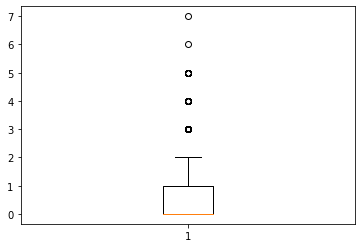

In [5]:
stats.describe(data_array)
plt.boxplot(data_array)

In [17]:
selection = df[df["x"] == 100]

In [47]:
grouped = df.groupby("x")

(14710.707571801566, 133.08792364342102)

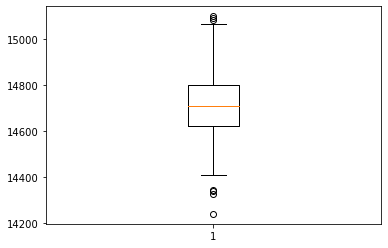

In [53]:
plt.boxplot(grouped.get_group(2)["y"])
grouped.get_group(2)["y"].mean(), grouped.get_group(2)["y"].std()

In [54]:
df.count()

x       94341
y       94341
y_sq    94341
dtype: int64

In [57]:
def spliterate(buf, chunk):
    for start in range(0, len(buf), chunk):
        yield buf[start:start + chunk]

[]

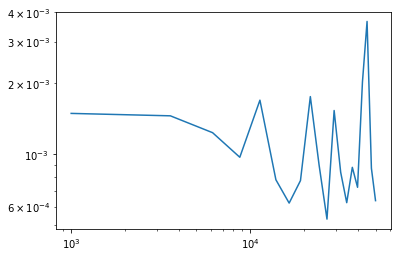

In [80]:
n_batches = 20

mean = np.zeros(n_batches)
stddev = np.zeros(n_batches)

x = np.linspace(1000, 50000, n_batches).astype(int)

for i, chunk_size in enumerate(x):

    means = []

    batches = spliterate(df["y"], chunk_size)

    n_batches = 0

    for tmp in batches:
        n_batches += 1
        #N = tmp.sum()
        means.append((tmp == 1).mean())
        #print((tmp == 1).mean(), (tmp == 1).std())

    means = np.array(means)
    #print(np.mean(means), np.std(means))

   
    

    
    # mean = np.mean(means)

    squared_sum = np.sum(np.square(means))/n_batches
    sum_squared = np.square(np.sum(means/n_batches))

    err = (1/(np.sqrt(n_batches)))*np.sqrt(squared_sum-sum_squared) 

    mean[i] = np.mean(means)
    stddev[i] = err

plt.plot(x, stddev)
plt.loglog()
    

In [2]:
q = 1.0
n_size = 512
N = 2*n_size

x_val = 100

data_array = []
data_array_sq = []

df = pd.DataFrame(columns=['x', 'y', 'y_sq'])

for measurement in SimDataIterator(q=q, n=n_size, susceptibility=True):
    for [x, y, y_sq] in measurement["stringhist"]:
        if (not y == 0) and (x == x_val):
            # values_to_add = {'x': x, 'y': y, 'y_sq': y_sq}
            #row_to_add = pd.Series(values_to_add)
            # df = df.append(row_to_add, ignore_index=True)
            
            data_array.append(y)
            #data_array_sq.append(y)

data_array = np.array(data_array)
#data_array_sq = np.array(data_array_sq)


TypeError: __init__() got an unexpected keyword argument 'susceptibility'

In [83]:
data_array

array([2, 1, 2, ..., 1, 1, 1])

[]

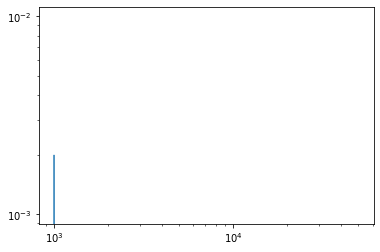

In [84]:
n_batches = 20

mean = np.zeros(n_batches)
stddev = np.zeros(n_batches)

x = np.linspace(1000, 50000, n_batches).astype(int)

for i, chunk_size in enumerate(x):

    means = []

    batches = spliterate(data_array, chunk_size)

    n_batches = 0

    for tmp in batches:
        n_batches += 1
        #N = tmp.sum()
        means.append((tmp == 1).mean())
        #print((tmp == 1).mean(), (tmp == 1).std())

    means = np.array(means)
    #print(np.mean(means), np.std(means))

   
    

    
    # mean = np.mean(means)

    squared_sum = np.sum(np.square(means))/n_batches
    sum_squared = np.square(np.sum(means/n_batches))

    err = (1/(np.sqrt(n_batches)))*np.sqrt(squared_sum-sum_squared) 

    mean[i] = np.mean(means)
    stddev[i] = err

plt.plot(x, stddev)
plt.loglog()

In [85]:
class SimDataStringIterator(object):
    def __init__(self, q, n, susceptibility=False):
        self.q = q
        self.n = n
        self.susceptibility = susceptibility
        self.paths = getsims(self.q, self.n, pre="sim_datastring" if self.susceptibility else "sim_data")

    def __iter__(self):
        return self

    def __next__(self):
        if len(self.paths) == 0:
            raise StopIteration
        path = self.paths.pop(0)
        with open(path) as file:
            data = file.read()

        return data

In [92]:
q = 1.0
n_size = 512
N = 2*n_size

df = pd.DataFrame(columns=['x', 'y', 'y_sq'])

iter = SimDataIterator(q=q, n=n_size, susceptibility=True)

for measurement in iter:
    df_row = pd.DataFrame(measurement["stringhist"], columns=['x', 'y', 'y_sq'])
    #print("left =", len(iter.paths))
    df = df.append(df_row, ignore_index=True)




In [93]:
df

x      y    y_sq
0           1      0       0
1           2  14689  232341
2           3      0       0
3           4   3308   15036
4           5      0       0
...       ...    ...     ...
3209211  1020   3259   14725
3209212  1021      0       0
3209213  1022  14649  230329
3209214  1023      0       0
3209215  1024      0       0

[3209216 rows x 3 columns]